<a href="https://colab.research.google.com/github/adilawan1/deep-learning-assignment-1/blob/main/DeepLearning_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Name: Ahmed Adil
# Roll Number: 25280033

# Assignment 1 (AI-600)

# Question 1 (Part A)

In [61]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('/content/train.csv')
df.info()
df['room_type'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41348 entries, 0 to 41347
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   neighbourhood_group  40509 non-null  object 
 1   room_type            40737 non-null  object 
 2   minimum_nights       40026 non-null  float64
 3   amenity_score        40432 non-null  float64
 4   number_of_reviews    40225 non-null  float64
 5   availability_365     40753 non-null  float64
 6   price_class          41348 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 2.2+ MB


,count
room_type,
Entire home/apt,21099
Private room,18663
Shared room,975


In [62]:
from pandas.core.arrays import categorical
missing_counts = df.isnull().sum()
print(missing_counts[missing_counts > 0])

numerical_cols_to_impute = ['minimum_nights', 'amenity_score', 'number_of_reviews', 'availability_365']
# price_class is numerical but there are no null values
categorical_cols_to_impute = ['neighbourhood_group', 'room_type']

for col in numerical_cols_to_impute:
    median_value = df[col].median()
    df[col].fillna(median_value, inplace=True)
    print(f"Missing values in '{col}' imputed with median: {median_value}")

# Verify that there are no more missing values in these columns
print("\nMissing values after imputation:")
print(df[numerical_cols_to_impute].isnull().sum())

for col in categorical_cols_to_impute:
    mode_value = df[col].mode()[0]
    df[col].fillna(mode_value, inplace=True)
    print(f"Missing values in '{col}' imputed with mode: {mode_value}")

# Verify that there are no more missing values in these columns
print("\nMissing values after imputation:")
print(df[categorical_cols_to_impute].isnull().sum())

df['room_type'].value_counts()

neighbourhood_group     839
room_type               611
minimum_nights         1322
amenity_score           916
number_of_reviews      1123
availability_365        595
dtype: int64
Missing values in 'minimum_nights' imputed with median: 3.0
Missing values in 'amenity_score' imputed with median: 51.4
Missing values in 'number_of_reviews' imputed with median: 5.0
Missing values in 'availability_365' imputed with median: 44.0

Missing values after imputation:
minimum_nights       0
amenity_score        0
number_of_reviews    0
availability_365     0
dtype: int64
Missing values in 'neighbourhood_group' imputed with mode: Manhattan
Missing values in 'room_type' imputed with mode: Entire home/apt

Missing values after imputation:
neighbourhood_group    0
room_type              0
dtype: int64


/tmp/ipython-input-2585969389.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_value, inplace=True)
/tmp/ipython-input-2585969389.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

,count
room_type,
Entire home/apt,21710
Private room,18663
Shared room,975


neighbourhood_group
Manhattan        0.453323
Brooklyn         0.403695
Queens           0.113573
Bronx            0.021936
Staten Island    0.007473
Name: proportion, dtype: float64


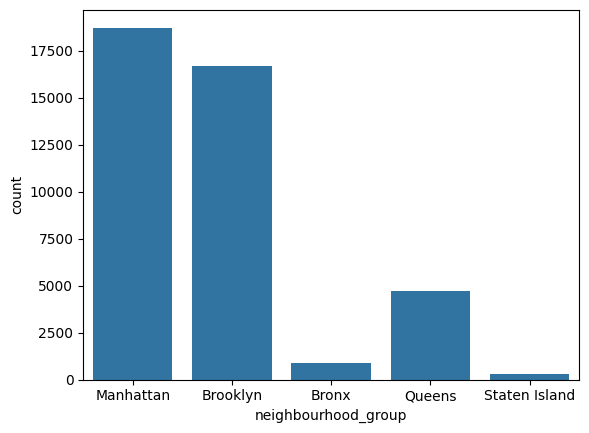

room_type
Entire home/apt    0.525056
Private room       0.451364
Shared room        0.023580
Name: proportion, dtype: float64


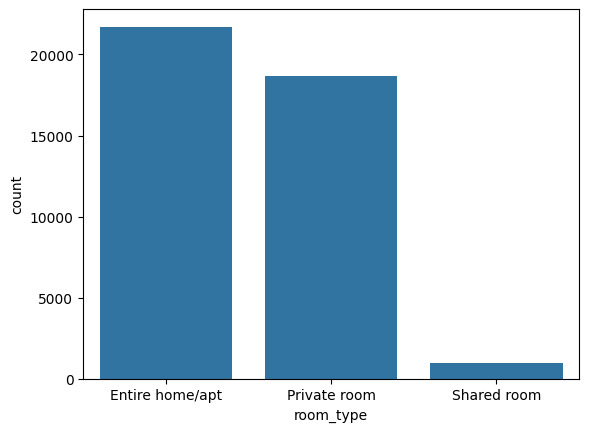

minimum_nights
1.0       0.250363
2.0       0.231837
3.0       0.191182
30.0      0.075917
4.0       0.065493
            ...   
225.0     0.000024
1000.0    0.000024
222.0     0.000024
275.0     0.000024
88.0      0.000024
Name: proportion, Length: 98, dtype: float64


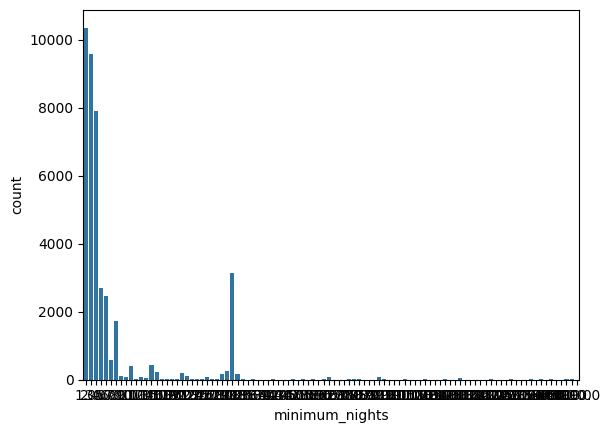

amenity_score
51.4    0.024040
52.0    0.002709
46.8    0.002636
49.9    0.002612
53.6    0.002612
          ...   
99.0    0.000048
97.9    0.000048
97.6    0.000048
95.2    0.000024
98.5    0.000024
Name: proportion, Length: 891, dtype: float64


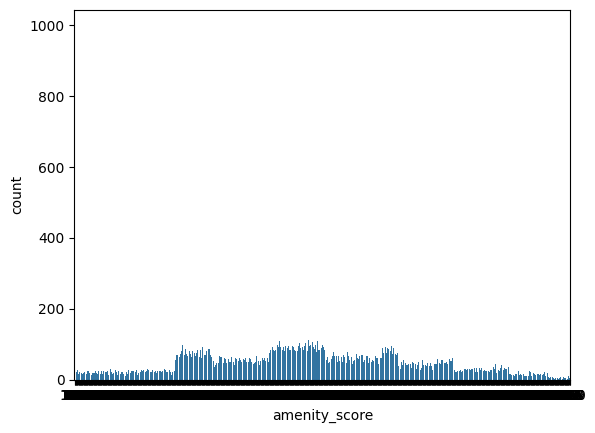

number_of_reviews
0.0      0.191690
1.0      0.100609
2.0      0.070088
5.0      0.060487
3.0      0.050861
           ...   
314.0    0.000024
430.0    0.000024
278.0    0.000024
607.0    0.000024
253.0    0.000024
Name: proportion, Length: 379, dtype: float64


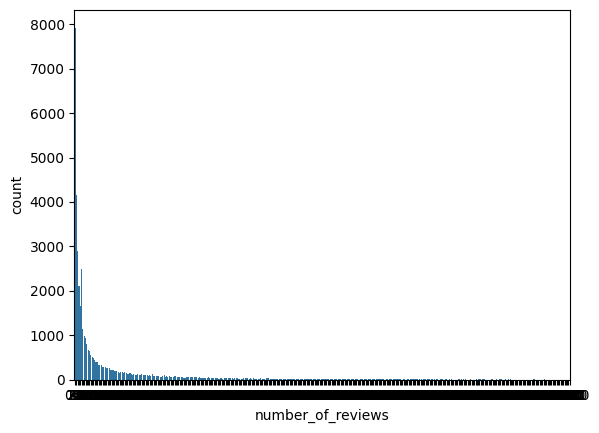

availability_365
0.0      0.355882
365.0    0.025394
44.0     0.016422
364.0    0.009481
1.0      0.008271
           ...   
195.0    0.000508
196.0    0.000484
183.0    0.000460
206.0    0.000435
202.0    0.000363
Name: proportion, Length: 366, dtype: float64


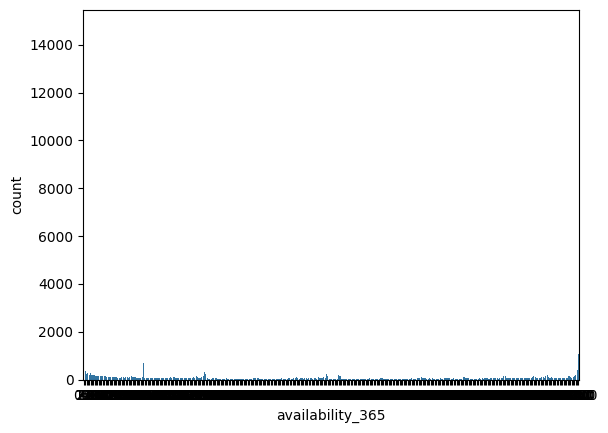

price_class
1    0.563195
2    0.238077
0    0.134638
3    0.064090
Name: proportion, dtype: float64


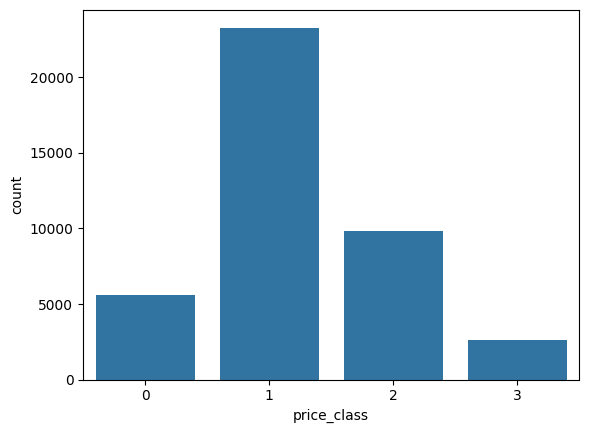

In [63]:
for col in df.columns:
    # Get raw counts
    counts = df[col].value_counts()

    # Get percentage (often more useful)
    percent = df[col].value_counts(normalize=True)
    print(percent)

    # Visualization
    sns.countplot(x=col, data=df)
    plt.show()

**Comment on class imbalance:**

The imbalance (i.e. more than half of the data belongs to class 1 (56.31%)), shows that this needs to be addressed as it will have an on the biasness of the model towards the majority class (i.e. class 1)

# Encoding scheme

We are using **one-hot encoding** because both the neighborhood_group and room_type columns have low cardinalities and don't have a natural order or relationships. The label encoding scheme would have been better if there was some natural relationship between these column values (e.g. small, medium, large etc)

In [64]:
df = pd.get_dummies(df, columns=categorical_cols_to_impute, drop_first=True, dtype=int)
print("First 5 rows of the DataFrame after one-hot encoding:")
print(df.head())
print("\nDataFrame Info after one-hot encoding:")
df.info()

First 5 rows of the DataFrame after one-hot encoding:
   minimum_nights  amenity_score  number_of_reviews  availability_365  \
0             2.0           82.5               15.0             254.0   
1             2.0           53.7                1.0               0.0   
2             2.0           47.8               70.0              90.0   
3             2.0           58.8                1.0              44.0   
4             2.0           32.2                0.0              89.0   

   price_class  neighbourhood_group_Brooklyn  neighbourhood_group_Manhattan  \
0            3                             0                              1   
1            1                             0                              1   
2            1                             1                              0   
3            1                             0                              1   
4            1                             0                              0   

   neighbourhood_group_Queens  n

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41348 entries, 0 to 41347
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   minimum_nights                     41348 non-null  float64
 1   amenity_score                      41348 non-null  float64
 2   number_of_reviews                  41348 non-null  float64
 3   availability_365                   41348 non-null  float64
 4   price_class                        41348 non-null  int64  
 5   neighbourhood_group_Brooklyn       41348 non-null  int64  
 6   neighbourhood_group_Manhattan      41348 non-null  int64  
 7   neighbourhood_group_Queens         41348 non-null  int64  
 8   neighbourhood_group_Staten Island  41348 non-null  int64  
 9   room_type_Private room             41348 non-null  int64  
 10  room_type_Shared room              41348 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 3.5 MB


# Normalization

*   numerical features

Standard Scalar was used since it helps turning the data have a mean at 0 with the same spread across all the features.


In [66]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[numerical_cols_to_impute] = scaler.fit_transform(df[numerical_cols_to_impute])

# Plot and analyze relationships between individual features and the target variable using suitable visualizations.

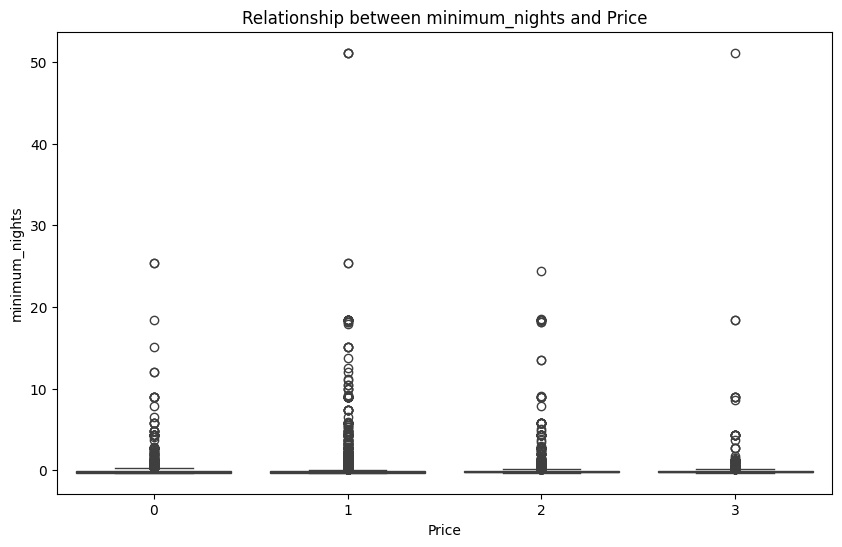

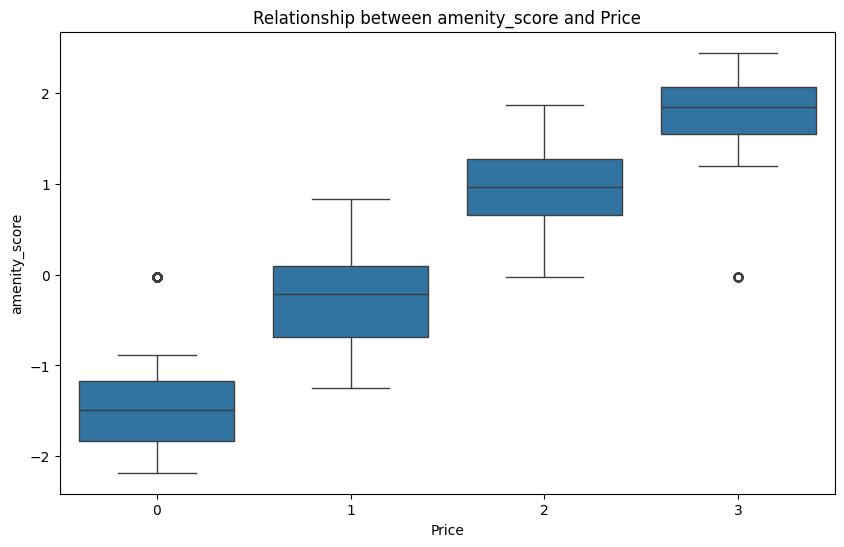

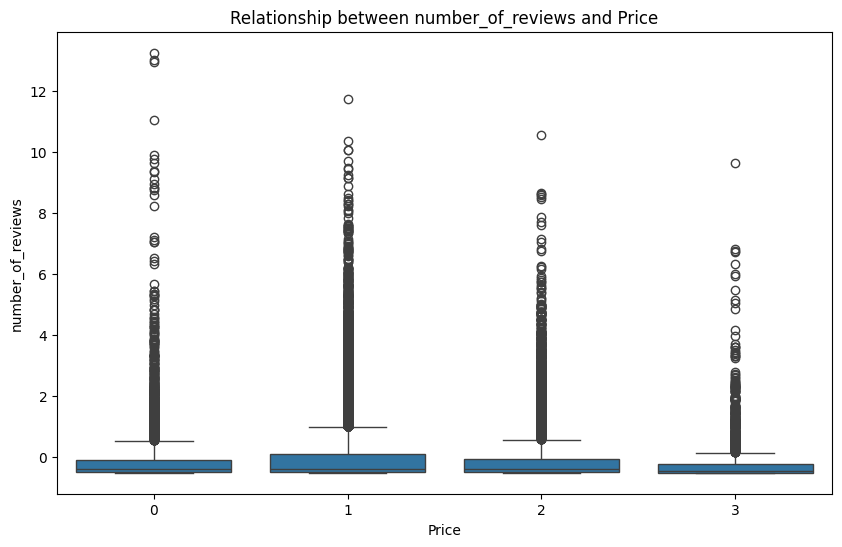

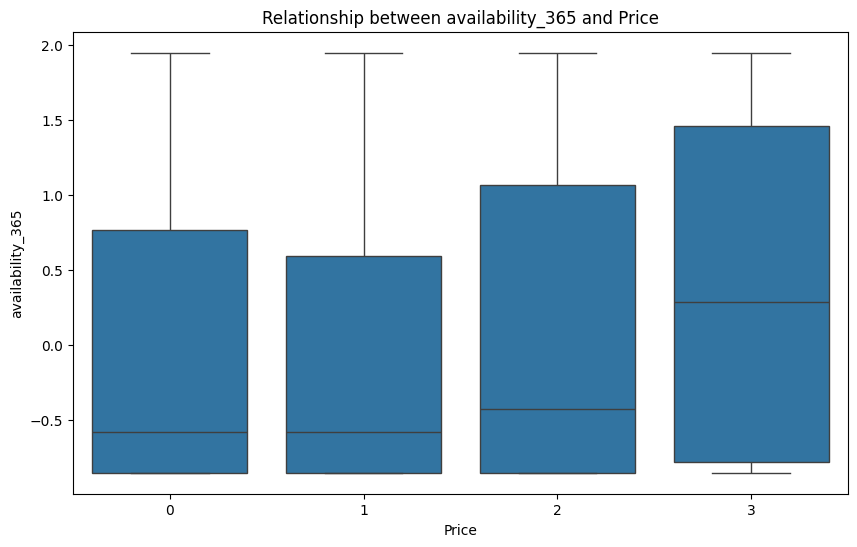

In [76]:
# Using a scatterplot to see the relationship
for col in numerical_cols_to_impute:
  plt.figure(figsize=(10, 6))
  sns.boxplot(y=col, x='price_class', data=df)
  plt.title(f'Relationship between {col} and Price')
  plt.xlabel('Price')
  plt.ylabel(col)
  plt.show()

In [82]:
# Select your one-hot columns and the price
cols_to_check = [
    'neighbourhood_group_Brooklyn',
    # 'neighbourhood_group_Bronx',
    'neighbourhood_group_Manhattan',
    'neighbourhood_group_Queens',
    'neighbourhood_group_Staten Island',
    'room_type_Private room',
    'room_type_Shared room',
    # 'Entire home/apt',
    'price_class'
]

# Check correlation
print(df[cols_to_check].corr()['price_class'].sort_values(ascending=False))

price_class                          1.000000
neighbourhood_group_Manhattan        0.319295
neighbourhood_group_Staten Island   -0.042783
room_type_Shared room               -0.148515
neighbourhood_group_Queens          -0.168277
neighbourhood_group_Brooklyn        -0.179231
room_type_Private room              -0.494783
Name: price_class, dtype: float64


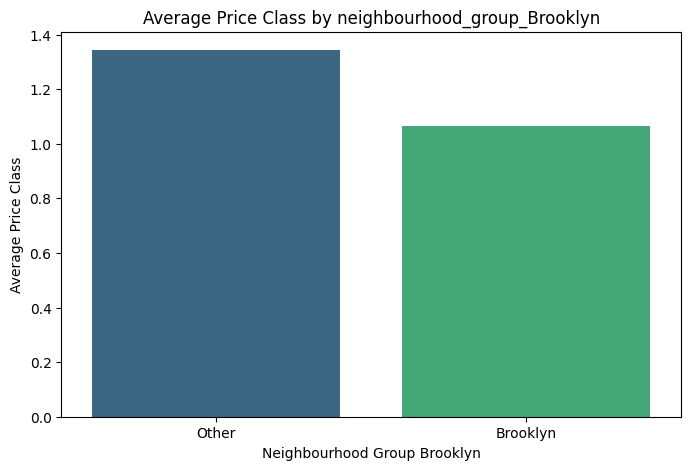

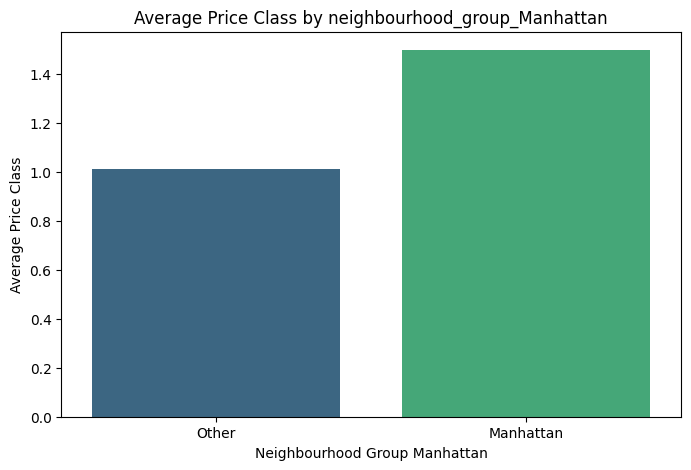

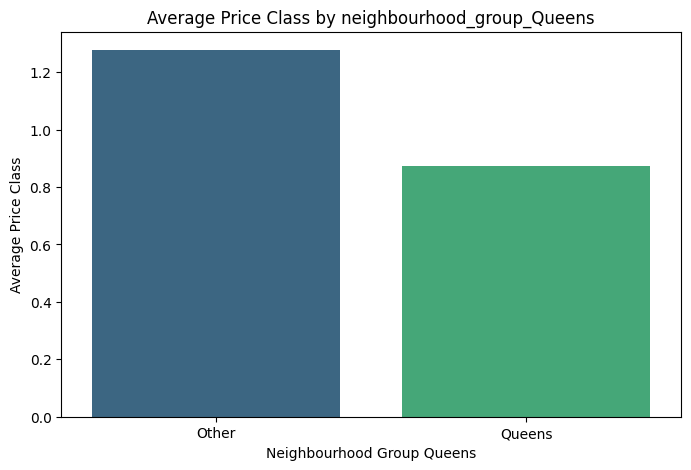

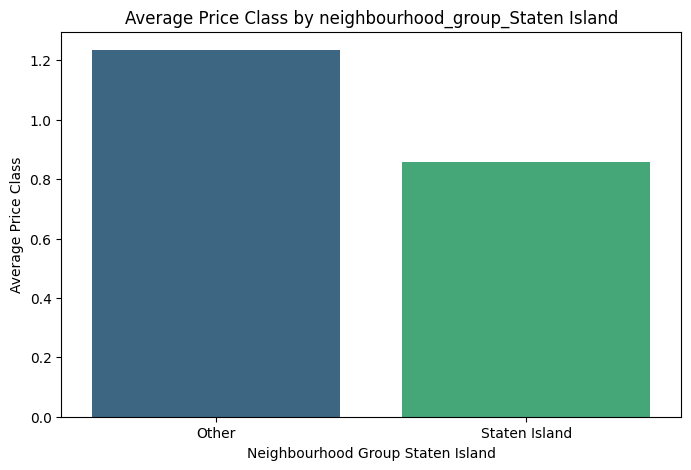

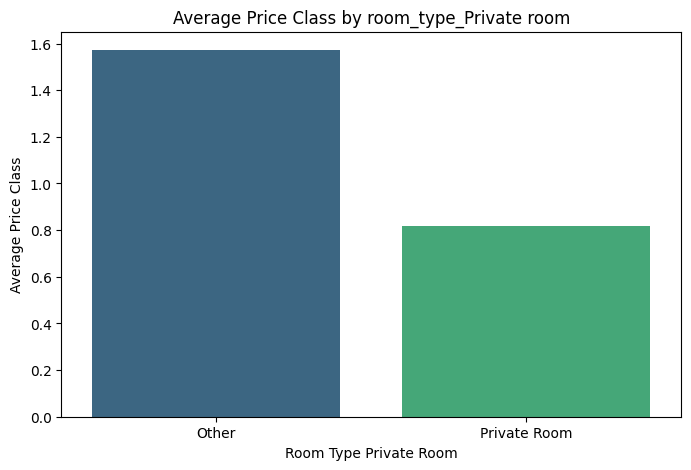

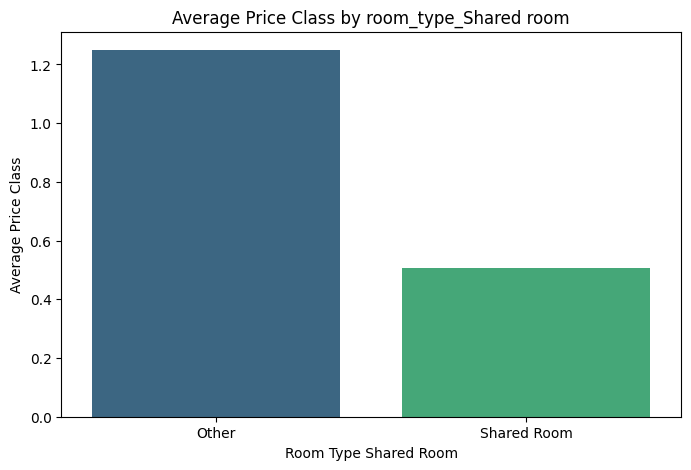

In [84]:
one_hot_cols_to_plot = [
    'neighbourhood_group_Brooklyn',
    'neighbourhood_group_Manhattan',
    'neighbourhood_group_Queens',
    'neighbourhood_group_Staten Island',
    'room_type_Private room',
    'room_type_Shared room'
]

for col in one_hot_cols_to_plot:
    # Group by the one-hot encoded column and calculate the mean price_class
    avg_price_class = df.groupby(col)['price_class'].mean().reset_index()

    plt.figure(figsize=(8, 5))
    sns.barplot(x=col, y='price_class', data=avg_price_class, palette='viridis', hue=col, legend=False)
    plt.title(f'Average Price Class by {col}')
    plt.xlabel(col.replace('_', ' ').title())
    plt.ylabel('Average Price Class')
    plt.xticks(ticks=[0, 1], labels=['Other', col.split('_')[-1].title().replace('group ', '').replace('room ', '')])
    plt.show()

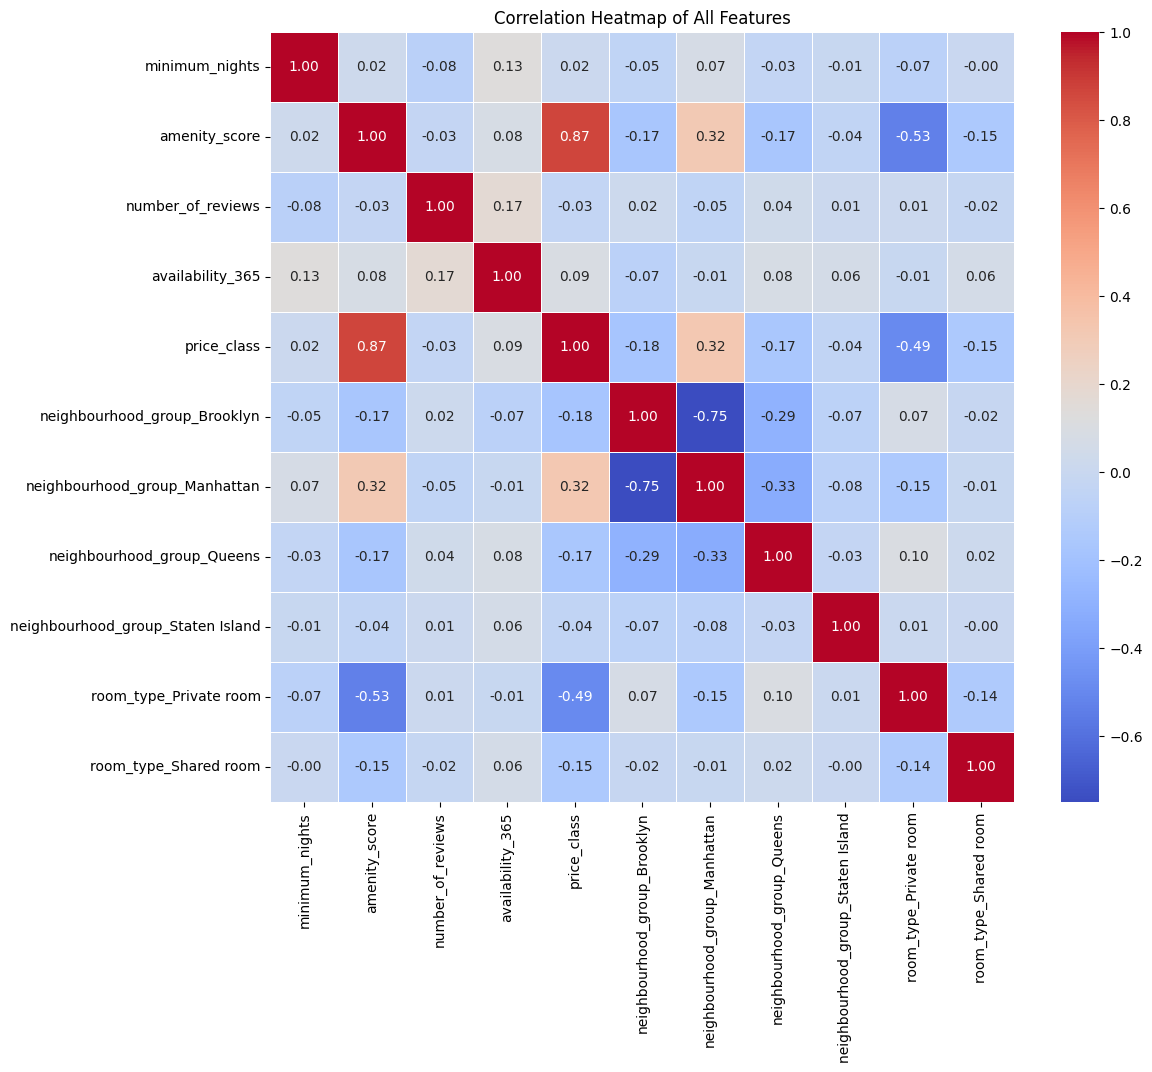

In [85]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap of All Features')
plt.show()

# Correlation matrix among numerical features

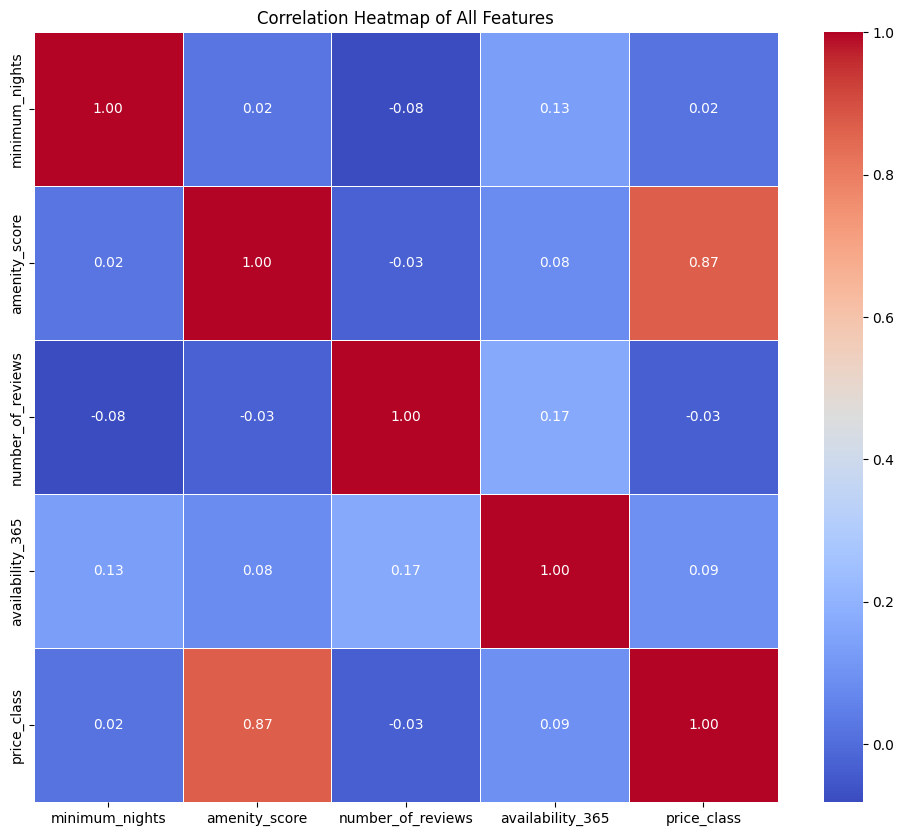

In [91]:
numerical_features_and_target = ['minimum_nights', 'amenity_score', 'number_of_reviews', 'availability_365', 'price_class']

plt.figure(figsize=(12, 10))
sns.heatmap(df[numerical_features_and_target].corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap of All Features')
plt.show()

# amenity_score and price_class:
This pair shows a very strong positive correlation of 0.865. This is the most significant relationship observed among the numerical features. It indicates that as the amenity_score increases, the price_class also tends to increase significantly. This suggests that the availability and quality of amenities are major drivers for the pricing category of a listing.

#  Most influential for prediction

**amenity_score:** This feature stands out as the most influential. It exhibits a very strong positive correlation of 0.865 with price_class (as seen in the numerical correlations discussed, and implicitly visible in the overall correlation heatmap)

**room_type_Private room:** This one-hot encoded feature shows a strong negative correlation of -0.495 with price_class. The bar plots confirm that listings categorized as a 'Private room' tend to have a significantly lower average price_class compared to other room types (especially 'Entire home/apt').

**neighbourhood_group_Manhattan:** This feature has a notable positive correlation of 0.319 with price_class. The bar plots clearly demonstrate that listings in Manhattan have a considerably higher average price_class than those in other neighborhoods.


# Unusually predictive or suspiciously dominant

The feature that appears most dominant is amenity_score with its correlation of 0.865 with price_class.

This can be seen from the correlation matrices.